In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('../data/Anonymize_Loan_Default_data.csv', encoding='unicode_escape')
# display un-truncated columns when calling upon dataframe
pd.set_option('display.max_columns', None)

In [38]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully Paid,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0


In [153]:
df[df.columns[0:19]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           38480 non-null  int64  
 1   id                   38480 non-null  int64  
 2   member_id            38480 non-null  int64  
 3   loan_amnt            38479 non-null  float64
 4   funded_amnt          38479 non-null  float64
 5   funded_amnt_inv      38479 non-null  float64
 6   term                 38480 non-null  object 
 7   int_rate             38480 non-null  float64
 8   installment          38479 non-null  float64
 9   emp_length           37487 non-null  object 
 10  home_ownership       38480 non-null  object 
 11  annual_inc           38478 non-null  float64
 12  verification_status  38480 non-null  object 
 13  issue_d              38480 non-null  object 
 14  loan_status          38480 non-null  object 
 15  purpose              38480 non-null 

In [157]:
df[df.columns[19:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   delinq_2yrs             38479 non-null  float64
 1   earliest_cr_line        38480 non-null  object 
 2   inq_last_6mths          38479 non-null  float64
 3   mths_since_last_delinq  14117 non-null  float64
 4   open_acc                38479 non-null  float64
 5   pub_rec                 38479 non-null  float64
 6   revol_bal               38476 non-null  float64
 7   revol_util              38421 non-null  object 
 8   total_acc               38479 non-null  float64
 9   total_pymnt             38479 non-null  float64
 10  total_pymnt_inv         38479 non-null  float64
 11  total_rec_prncp         38479 non-null  float64
 12  total_rec_int           38479 non-null  float64
 13  last_pymnt_d            38409 non-null  object 
 14  last_pymnt_amnt         38479 non-null

In [39]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,38480.000000,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,38479.000000,38479.000000,14117.000000,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38480.000000
mean,19240.500000,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,0.151927,1.083942,35.009846,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757,0.151481
std,11108.363516,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,0.507592,1.534814,22.426843,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583,0.358522
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9620.750000,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000,0.000000
50%,19240.500000,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,0.000000,1.000000,33.000000,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000,0.000000
75%,28860.250000,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,0.000000,2.000000,51.000000,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000,0.000000
max,38480.000000,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,11.000000,33.000000,120.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


In [170]:
#Investigating low & high member_id
df.query('member_id < 1000')
df.query('member_id == @df.member_id.max()')
df[df.member_id.isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail


In [167]:
# Investigating various loan amounts for issues
df.query('loan_amnt == 0') #already popped up from test with low member_id
df.query('loan_amnt < 1000')
df.query('loan_amnt  == @df.loan_amnt.max()')
df[df.loan_amnt.isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
54,1,1,1,NaN,NaN,NaN,60 months,100.99,NaN,10+ years,MORTGAGE,NaN,Verified,Jan-07,Current,credit_card,999xx,AA,100.0,NaN,Dec-99,NaN,0.0,NaN,NaN,NaN,100.00%,NaN,NaN,NaN,NaN,NaN,Jan-99,NaN,Jan-99,Jan-99,0


In [168]:
# Investigating various funded amounts for issues
df.query('funded_amnt == 0') #already popped up from test with low member_id
df.query('funded_amnt < 1000')
df.query('funded_amnt  == @df.funded_amnt.max()')
df[df.funded_amnt.isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
54,1,1,1,NaN,NaN,NaN,60 months,100.99,NaN,10+ years,MORTGAGE,NaN,Verified,Jan-07,Current,credit_card,999xx,AA,100.0,NaN,Dec-99,NaN,0.0,NaN,NaN,NaN,100.00%,NaN,NaN,NaN,NaN,NaN,Jan-99,NaN,Jan-99,Jan-99,0


In [175]:
# Investigating various funded amounts invested for issues
df.query('funded_amnt_inv == 0') #already popped up from test with low member_id
df.query('funded_amnt_inv < 1000 & funded_amnt_inv > 0')
df.query('funded_amnt_inv  == @df.funded_amnt_inv.max()')
df[df.funded_amnt_inv.isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
54,1,1,1,NaN,NaN,NaN,60 months,100.99,NaN,10+ years,MORTGAGE,NaN,Verified,Jan-07,Current,credit_card,999xx,AA,100.0,NaN,Dec-99,NaN,0.0,NaN,NaN,NaN,100.00%,NaN,NaN,NaN,NaN,NaN,Jan-99,NaN,Jan-99,Jan-99,0


In [178]:
# Investigating term lengths
df.term.unique()
df[df.term.isna()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail


In [201]:
#Investigating interest rates
df.query('int_rate == 0')
df.query('int_rate < 6')
df.query('int_rate > 24 & int_rate < 100')
df.query('int_rate  == @df.int_rate.max()')
df[df.int_rate.isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail


In [238]:
#Investigating installments
df.query('installment == 0')
#plt.hist(df.query('installment > 0').installment)
df[df.installment.isnull()]


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
54,1,1,1,NaN,NaN,NaN,60 months,100.99,NaN,10+ years,MORTGAGE,NaN,Verified,Jan-07,Current,credit_card,999xx,AA,100.0,NaN,Dec-99,NaN,0.0,NaN,NaN,NaN,100.00%,NaN,NaN,NaN,NaN,NaN,Jan-99,NaN,Jan-99,Jan-99,0


In [205]:
#Investigating employment lengths
df.emp_length.unique()
df[df.emp_length.isna()].tail(50)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
36294,36295,588901,756562,15000.0,15000.0,15000.000000,36 months,7.51,466.67,NaN,MORTGAGE,40800.00,Not Verified,Oct-10,Fully Paid,home_improvement,532xx,WI,5.59,0.0,May-76,1.0,NaN,16.0,0.0,5137.0,7%,31.0,16800.139740,16800.14,15000.00,1800.14,Oct-13,512.09,NaN,Jun-16,0
36365,36366,879404,1094281,6000.0,6000.0,5975.000000,36 months,7.90,187.75,NaN,RENT,38400.00,Source Verified,Sep-11,Charged Off,moving,010xx,MA,10.63,0.0,Apr-02,0.0,NaN,3.0,0.0,698.0,53.70%,29.0,4885.570000,4865.24,4196.18,689.39,Dec-13,187.75,NaN,Jun-16,1
36389,36390,866870,1080387,12000.0,12000.0,12000.000000,36 months,14.79,414.76,NaN,RENT,25536.00,Verified,Sep-11,Fully Paid,debt_consolidation,936xx,CA,10.15,0.0,Jul-70,1.0,NaN,5.0,1.0,8012.0,70.30%,12.0,14207.172800,14207.17,12000.00,2207.17,Apr-13,6755.04,NaN,Jun-14,0
36549,36550,651913,833847,4000.0,4000.0,4000.000000,60 months,14.17,93.43,NaN,MORTGAGE,36000.00,Verified,Jan-11,Charged Off,major_purchase,444xx,OH,12.93,0.0,Mar-93,2.0,NaN,12.0,1.0,8649.0,55.20%,22.0,2235.360000,2235.36,1269.21,966.15,Feb-13,93.43,NaN,Jun-16,1
36566,36567,626749,803132,14500.0,14475.0,13238.299730,36 months,6.91,446.36,NaN,MORTGAGE,35500.00,Verified,Dec-10,Fully Paid,debt_consolidation,610xx,IL,24.51,0.0,Jun-95,1.0,NaN,13.0,0.0,24751.0,41.40%,52.0,15082.685480,13591.19,14475.00,607.69,Aug-11,11959.66,NaN,Jul-12,0
36569,36570,1015565,1243024,17000.0,17000.0,17000.000000,36 months,6.03,517.41,NaN,MORTGAGE,61200.00,Source Verified,Nov-11,Fully Paid,debt_consolidation,132xx,NY,4.63,0.0,Jul-93,2.0,NaN,7.0,0.0,10068.0,29.20%,34.0,17553.034490,17553.03,17000.00,553.03,Jun-12,14450.77,NaN,May-16,0
36584,36585,1004149,1230780,8000.0,8000.0,8000.000000,36 months,8.90,254.03,NaN,MORTGAGE,28776.00,Not Verified,Oct-11,Fully Paid,home_improvement,301xx,GA,9.47,1.0,Dec-69,3.0,19.0,5.0,0.0,3270.0,16.60%,14.0,8571.460952,8571.46,8000.00,571.46,Oct-12,6035.43,NaN,Sep-14,0
36595,36596,884850,1100423,3000.0,3000.0,2950.000000,36 months,6.03,91.31,NaN,MORTGAGE,65000.00,Source Verified,Sep-11,Fully Paid,vacation,838xx,WA,11.08,0.0,Mar-75,0.0,38.0,11.0,0.0,3656.0,5.80%,36.0,3234.091305,3180.19,3000.00,234.09,Jul-13,1410.49,NaN,Jun-16,0
36662,36663,879362,1094183,6000.0,6000.0,6000.000000,36 months,11.71,198.46,NaN,OWN,31200.00,Not Verified,Sep-11,Fully Paid,other,604xx,IL,18.00,0.0,Nov-93,0.0,NaN,6.0,0.0,15041.0,93.40%,9.0,7142.464658,7142.46,6000.00,1142.46,Sep-14,406.56,NaN,Jun-16,0
36671,36672,630137,807330,12000.0,12000.0,12000.000000,36 months,12.98,404.22,NaN,RENT,53000.00,Verified,Dec-10,Does not meet the credit policy. Status:Charged Off,debt_consolidation,112xx,NY,15.42,0.0,May-98,5.0,NaN,19.0,0.0,13968.0,36.80%,40.0,3631.140000,3631.14,2574.53,1056.61,Sep-11,404.22,Jan-12,Jun-16,1


In [208]:
#Investigating home_ownership
df.home_ownership.unique()
df[df.home_ownership.isna()]

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE'], dtype=object)

In [229]:
#Investigating annual income
df.query('annual_inc == 0')
df.query('annual_inc > @df.annual_inc.quantile(.999) & loan_amnt < 5000')

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
741,742,643926,824049,2000.0,2000.0,2000.0,36 months,9.99,64.53,10+ years,MORTGAGE,948000.0,Verified,Jan-11,Fully Paid,debt_consolidation,617xx,IL,2.40,1.0,May-86,2.0,9.0,16.0,0.0,8515.0,29.40%,38.0,2323.180551,2323.18,2000.00,323.18,Jan-14,73.26,NaN,Jan-14,0
6444,6445,598451,768063,3000.0,3000.0,3000.0,36 months,9.25,95.75,10+ years,MORTGAGE,744000.0,Source Verified,Oct-10,Does not meet the credit policy. Status:Fully Paid,debt_consolidation,495xx,MI,1.44,0.0,Jan-95,5.0,NaN,14.0,0.0,17166.0,63.60%,52.0,3447.086734,3447.09,3000.01,447.07,Nov-13,101.77,Dec-13,Sep-15,0
16903,16904,468128,589440,1000.0,1000.0,1000.0,36 months,8.94,31.78,2 years,MORTGAGE,780000.0,Source Verified,Dec-09,Fully Paid,debt_consolidation,600xx,IL,1.39,0.0,Mar-02,2.0,NaN,15.0,0.0,4202.0,10.90%,24.0,1014.781742,1014.78,1000.00,14.78,Mar-10,983.25,NaN,Mar-10,0
23918,23919,622039,797223,4200.0,4200.0,4200.0,36 months,9.62,134.78,3 years,MORTGAGE,828000.0,Source Verified,Nov-10,Fully Paid,debt_consolidation,301xx,GA,2.00,0.0,Dec-95,1.0,NaN,13.0,0.0,28265.0,88.30%,33.0,4851.999243,4852.00,4200.00,652.00,Dec-13,145.69,NaN,Jun-16,0
24520,24521,645481,825942,4500.0,4500.0,4000.0,36 months,6.91,138.77,7 years,MORTGAGE,780000.0,Source Verified,Jan-11,Fully Paid,major_purchase,212xx,MD,0.58,0.0,Feb-01,4.0,NaN,7.0,0.0,3015.0,37.70%,15.0,4976.721138,4423.76,4500.00,461.72,Apr-13,1357.40,NaN,Jun-16,0
28444,28445,624215,799972,3000.0,3000.0,3000.0,36 months,9.62,96.27,10+ years,RENT,984000.0,Source Verified,Dec-10,Does not meet the credit policy. Status:Fully Paid,other,752xx,TX,0.29,0.0,Jan-99,4.0,NaN,5.0,1.0,221.0,1.40%,12.0,3326.866988,3326.87,3000.00,326.87,May-12,1789.75,Jun-12,May-12,0
30163,30164,528009,682915,4500.0,4500.0,4500.0,60 months,7.88,90.99,8 years,MORTGAGE,1080000.0,Source Verified,Jun-10,Fully Paid,major_purchase,217xx,MD,0.57,0.0,Nov-83,0.0,31.0,7.0,0.0,46337.0,1.90%,20.0,5262.056984,5262.06,4500.00,762.06,May-13,2269.27,NaN,May-13,0


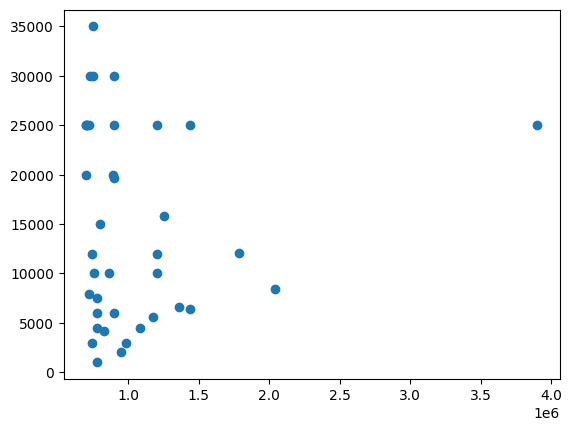

In [227]:
plt.scatter(x = df.query('annual_inc > @df.annual_inc.quantile(.999) & annual_inc < @df.annual_inc.max()').annual_inc, 
            y = df.query('annual_inc > @df.annual_inc.quantile(.999) & annual_inc < @df.annual_inc.max()').loan_amnt)

In [241]:
df.verification_status.unique()
df[df.verification_status.isna()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail


In [246]:
df.issue_d.unique()
df[df.issue_d.isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail


In [259]:
df.loan_status.value_counts()

loan_status
Fully Paid                                             29987
Charged Off                                             5111
Does not meet the credit policy. Status:Fully Paid      1782
Current                                                  867
Does not meet the credit policy. Status:Charged Off      689
Late (31-120 days)                                        20
In Grace Period                                           15
Late (16-30 days)                                          7
Default                                                    2
Name: count, dtype: int64

In [263]:
df.purpose.value_counts()

purpose
debt_consolidation    17917
credit_card            4974
other                  3950
home_improvement       2901
major_purchase         2079
small_business         1808
car                    1481
wedding                 909
medical                 675
moving                  562
house                   387
educational             386
vacation                360
renewable_energy         91
Name: count, dtype: int64

### Observations
- Need to drop index column "Unnamed: 0"
- Looks like there the member ids of 1 and 2 were tests based on issue dates, missing information, zipcodes and interest rates.
- Convert term into a numeric type (only 36 and 60 months). Maybe not, more categorical than anything.
- Zipcodes should be coded as strings, right? Nope, don't have full zips.
- There are about 900 rows with missing employment lengths.
- Looks like these loans were issued beteen 2008 and 2011 with the exception of 1 test loan in Dec 99.

Loan Purpose Description:
- **Fully Paid** Loan has been fully paid off.
- **Charged Off** Loan for which there is no longer a reasonable expectation of further payments (i.e. no chance of being repaid).
- **Does not meet the credit policy. Status:Fully Paid** While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn’t be approved on to the marketplace.
- **Does not meet the credit policy. Status:Charged Off** While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn’t be approved on to the marketplace.
- **Current** Loan is up to date on current payments.
- **In Grace Period** The loan is past due but still in the grace period of 15 days.
- **Late (31-120 days)** Loan hasn’t been paid in 31 to 120 days (late on the current payment).
- **Late (16-30 days)** Loan hasn’t been paid in 16 to 30 days (late on the current payment).
- **Default** Loan is defaulted on and no payment has been made for more than 121 days.

## Initial Wrangling

In [4]:
df_wrangled = df.copy()

In [5]:
#Dropping "Unnamed: 0" column
df_wrangled = df_wrangled.drop('Unnamed: 0', axis=1)

In [6]:
#Dropping rows: 'loan_amnt' = 0  & 'int_rate > 100'
zero_loan_amnt = set(df_wrangled.query('loan_amnt == 0').index)
large_int_rate = set(df_wrangled.query('int_rate > 100').index)
drop_rows = list(zero_loan_amnt.union(large_int_rate))

df_wrangled.drop(drop_rows, axis=0, inplace=True)

In [7]:
df_wrangled.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
1,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,877788,1092507,7000.0,7000.0,7000.0,36 months,9.91,225.58,10+ years,MORTGAGE,53796.0,Not Verified,Sep-11,Fully Paid,other,751xx,TX,10.80,3.0,Mar-98,3.0,3.0,7.0,0.0,3269.0,47.20%,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,875406,1089981,2000.0,2000.0,2000.0,36 months,5.42,60.32,10+ years,RENT,30000.0,Not Verified,Sep-11,Fully Paid,debt_consolidation,112xx,NY,3.60,0.0,Jan-75,0.0,72.0,7.0,0.0,0.0,0%,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
5,506439,652909,3600.0,3600.0,3600.0,36 months,10.25,116.59,10+ years,MORTGAGE,675048.0,Not Verified,Apr-10,Does not meet the credit policy. Status:Fully ...,other,352xx,AL,1.55,0.0,Apr-98,4.0,25.0,8.0,0.0,0.0,0%,25.0,4206.031191,4206.03,3600.00,606.03,May-13,146.75,Jun-13,Jun-16,0


In [8]:
df_wrangled.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,3.847800e+04,3.847800e+04,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,3.847700e+04,38478.000000,38478.000000,38478.000000,14116.000000,38478.000000,38478.000000,3.847500e+04,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000,38478.000000
mean,6.650325e+05,8.262328e+05,11095.015983,10832.137845,10150.405309,12.162307,323.171653,6.899710e+04,13.376215,0.151931,1.083970,35.012326,9.343209,0.057903,1.429024e+04,22.109049,11981.008257,11274.812581,9646.663405,2232.826262,2614.509703,0.151463
std,2.191854e+05,2.792969e+05,7405.296268,7146.733214,7127.931629,3.709485,209.085323,6.447627e+04,6.729713,0.507598,1.534824,22.425701,4.497881,0.245710,2.194154e+04,11.588253,9006.415139,8946.161550,7051.748460,2570.185505,4392.006431,0.358504
min,5.473400e+04,7.069400e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.983722e+05,6.384872e+05,5200.000000,5100.000000,4950.000000,9.620000,165.740000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,6.000000,0.000000,3.640000e+03,13.000000,5463.171057,4811.980000,4400.000000,657.732500,212.032500,0.000000
50%,6.443430e+05,8.242635e+05,9750.000000,9600.000000,8497.610817,11.990000,277.980000,5.865000e+04,13.485000,0.000000,1.000000,33.000000,9.000000,0.000000,8.840000e+03,20.000000,9673.634873,8954.010000,8000.000000,1335.090000,526.005000,0.000000
75%,8.265722e+05,1.034708e+06,15000.000000,15000.000000,14000.000000,14.720000,429.350000,8.200000e+04,18.690000,0.000000,2.000000,51.000000,12.000000,0.000000,1.726600e+04,29.000000,16402.677492,15486.997500,13317.515000,2795.125000,3169.962500,0.000000
max,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.110000,1305.190000,6.000000e+06,29.990000,11.000000,33.000000,120.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000
